In [13]:
print(cycleDetectionDFS(dgraph))

False


In [1]:
### all paths from node u and v in a graph.
# This is amazing.
def allPathDFSUtils(graph, source, dest, visited, queue):
    visited[source] = True
    queue.append(source)
    if source == dest:
        print(queue)
    else:
        for neighbour in graph[source]:
            if not visited[neighbour]:
                allPathDFSUtils(graph, neighbour, dest, visited, queue) 
    queue.pop()
    visited[source] = False
    
def allPathsDFS(graph, source, dest):
    queue = []
    visited = [False for i in range(len(graph))]
    allPathDFSUtils(graph, source, dest, visited, queue)
    print(queue)

In [2]:
allPathsDFS(graph, 0, 5)

NameError: name 'graph' is not defined

In [16]:
### cycle detction in undirected graph
graph = [[2, 1, 4], [0, 3], [0, 4], [1, 4], [2, 0, 3]]
def findParent(parent, node):
    if parent[node] == -1:
        return node
    else:
        return findParent(parent, parent[node])
    
def UnionParent(parent, node1, node2):
    parent1 = findParent(parent, node1)
    parent2 = findParent(parent, node2)
    parent[parent2] = parent1
       
def cyclic(graph):
    parent = [-1 for i in range(len(graph))]
    prev = []
    for node in range(len(graph)):
        print(f"node is {node}")
        for neighbour in graph[node]:
            print(f"neigbour is {neighbour} and prev is {prev}")
            if neighbour not in prev:
                if findParent(parent, neighbour) == findParent(parent, node):
                    print(f"parent of neighbour is {findParent(parent, neighbour)}, and of node is {findParent(parent, node)}")
                    return True
                UnionParent(parent, node, neighbour)
        prev.append(node)
    return False
    
    

In [3]:
new_lis = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]
# new_graph = Graph(7, new_lis)
# cyclic(new_graph)
cyclic(graph)

NameError: name 'cyclic' is not defined

In [ ]:
# cycle detection in directed graph
#using color schemes.
# traverse a path using dfs, initally all nodes are white, means non of them have been traversed.While traversing a path mark its nodes grey if
# they are white and if a node is grey means you are in a cycle. But if path ends without any grey encounter mark all traverse node to black and 
# keep doing it untill you find cycle or exhaust the graph

def dfs(graph, node, color):
    # 2 -> white
    # 1 -> grey
    # 0 -> black
    color[node] = 2
    for neighbhour in graph[node]:
        if color[neighbhour] == 1:
            return True # ew got a cycle 
        if color[neighbhour] == 2 and dfs(graph, i, color):
            return True # we got cycle since dfs returned True on a white node
    # paht ends without any cycle so mark all visited nodes as black and return False
    graph[node] = 0
    return False

color = [2 for i in range(len(graph))]

got = 0
for i in range(len(graph)):
    if color[i] == 2:
        if dfs(graph, i, color):
            got = 1
            break
if got:
    print("Cycle detected")
else:
    print("NO cycle")

In [18]:
### Dijkstra
# make a shortestPathTree(sptset) and make every node false initially
# make dist list form source node with initial distance INF, only source node with 0 distance.
# make a function minDist which basically returns the index of node nearest node not visted in sptset.
# then run a for loop V times with everytime minDist returning a 'u' which is nearest to source.
# another for loop to get if next node of 'u' is shorter than already in dist list
# if so replace that element in dist with new one.


def minDist(spt, dist):
    minn = INF
    minn_index = None
    for i in range(len(dist)):
        if not spt[i] and dist[i]<=minn:
            minn = dist[i]
            minn_index = i
    return minn_index

def Dijkstra(wgraph, source):
    dist = [INF for i in range(len(wgraph))]
    spt = [False for i in range(len(wgraph))]
    dist[source] = 0
    for i in range(len(graph)):
        vertix = minDist(spt, dist)
        if vertix is None:
            break
        spt[vertix] = True
        for node in wgraph[vertix]:
            if not spt[node[0]] and dist[node[0]]>=dist[vertix]+node[1]:
                dist[node[0]] = dist[vertix]+node[1]
    print(dist)
            

In [19]:
Dijkstra(wgraph, 0)

[0, 4, 1, 6, 4, 11, 1073741823, 1073741823]


In [20]:
# MST implementation in python is easier so once implement it in C++.
'''
Algorithm explained.
let there be a graph with V vertices, and m vertices are connected optimally then to extend the tree the best 
possible connection will be to choose that connection which connectes the optimal tree to rest of nodes with 
least weighted node.
'''
def minEdge(graph, mst):
    minn = INF
    minVertix = None
    minNode = None
    for node in mst:
        for vertix in graph[node]:
            if vertix[0] not in mst:
                if vertix[1]<=minn:
                    minn = vertix[1]
                    minVertix = vertix[0]
                    minNode = node
    return minVertix, minNode
    
def MSTPrims(graph):
    mst = []
    mst.append(0)
    while len(mst) <= len(graph):
        minVertix, minNode = minEdge(graph, mst)
        print(f"{minVertix}-{minNode}")
        if minVertix is not None:
            mst.append(minVertix)
        else:
            break

In [21]:
MSTPrims(wgraph)

2-0
4-2
1-0
3-1
5-4
None-None


In [8]:
# bellmam-ford algorithm

# Algorithm explained.
# so basically you have to go through all the edges, and do the relaxation process.
# But do this V-1 times because a simple path have at max V-1 nodes because if all path are optimized then 
# in worst case total optimization(which is the relaxation process) to be performed over all edges is V-1.
# and if you can relax a path after V-1 times relaxtion, it means it has a negetive cycle because in case of 
# no-negetive cycle worst path can have V-1 nodes and after optimizing each edge V-1 times you should not be 
# able to relax it anymore.
# Negetive-cycled graph don't have valid shortest path.

def bellmanFord(graph, source):
    minDist = [INF for i in range(len(graph))]
    minDist[source] = 0
    for i in range(len(graph)-1):
        visited = [False for i in range(len(graph))]
        for node in range(len(graph)):
            for neighbour in graph[node]:
                if not visited[neighbour[0]] and minDist[neighbour[0]]>minDist[node]+neighbour[1]:
                    minDist[neighbour[0]] = minDist[node]+neighbour[1]
                    visited[neighbour[0]] = True
           
    visited = [False for i in range(len(graph))]
    for node in range(len(graph)):
            for neighbour in graph[node]:
                if not visited[neighbour[0]] and minDist[neighbour[0]]>minDist[node]+neighbour[1]:
                    print("report")
    print(minDist)

In [10]:
# nwlis = [(0, 1, 1), (0, 2, 2), (1, 3, 2), (1, 2, 3), (2, 3, -3), (3, 1, -3)]
# nwgraph = wGraph(4, nwlis, undirected=False)
# nwgraph = [[[1, 2, 3], [3], [3], []]]
#           [[3, -2, 4], [-1], [7], []]
nwgraph = [[[1,3], [2,-2], [3,4]], [[3, -1]], [[3, 7]], []]
bellmanFord(nwgraph, 0)

[0, 3, -2, 2]


In [24]:
# Salesman problem.
# this is NP hard and time complexity is O(n^2 * 2^n)

def dist(j, i, graph):
    for x in graph[j]:
        if x[0] == i:
            return x[1]
        else:
            return INF
        
def salesman(graph):
    s = []
    cost = [[INF for j in range(len(graph))] for i in range(len(graph))]
    for i in range(len(graph)):
        s.append(i)
        for j in range(1, len(graph)):
            if len(s) == 1:
                cost[i][j] = 0
            elif i == j:
                cost[i][j] = 0
            else:
                cost[i][j] = min(cost[i-1][j] + dist(j, i, graph), cost[i][j])
    print(cost)

In [25]:
swlis = [(0, 1, 10), (0, 2, 15), (1, 2, 35), (1, 3, 25), (2, 3, 30), (0, 3, 20)]
saleGraph = wGraph(4, swlis)
salesman(saleGraph)

This is the graph->[[(1, 10), (2, 15), (3, 20)], [(0, 10), (2, 35), (3, 25)], [(0, 15), (1, 35), (3, 30)], [(1, 25), (2, 30), (0, 20)]]
[[1073741823, 0, 0, 0], [1073741823, 0, 1073741823, 25], [1073741823, 1073741823, 0, 1073741823], [1073741823, 1073741823, 1073741823, 0]]


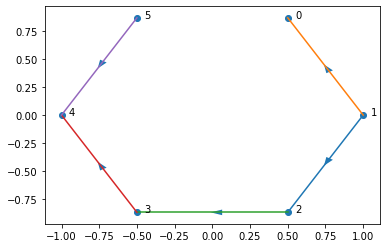

In [3]:
import numpy as np
import matplotlib.pyplot as plt

graph = [[], [2, 0], [3], [4], [], [4]]
def plotGraph(graph):
    no_node = len(graph)
    nodeX = []
    nodeY = []
    for i in range(no_node):
        value = np.exp(-2j*np.pi*i/no_node)
        value *= np.exp(1j*np.pi/3)
        x, y = np.real(value), np.imag(value)
        nodeX.append(x)
        nodeY.append(y)
    plt.scatter(nodeX, nodeY)
    delta = 0.01
    for i in range(len(graph)):
        plt.text(nodeX[i]+0.05, nodeY[i], "{}".format(i))
        for j in (graph[i]):
            plt.plot([nodeX[i], nodeX[j]],[nodeY[i], nodeY[j]])
            slope = (nodeY[j]-nodeY[i])/(nodeX[j]-nodeX[i])
            direction = -(nodeX[i]-nodeX[j])/abs(nodeX[i]-nodeX[j])
            plt.arrow((nodeX[i]+nodeX[j])/2,(nodeY[i]+nodeY[j])/2, direction*delta, direction*delta*slope, shape='full', lw=0, length_includes_head=True, head_width=.05)
    plt.show()
    
plotGraph(graph)

In [20]:
# ===========================================Backtracking-1==================================================
#The Knight’s tour problem
# here a knight is on 0,0 on an empty chess board and has to cover all postion only once print no of move on the positions
# if this is possible.

def safe(board, pos):
    w, h  = len(board), len(board[0])
    if (0<=pos[0]<w) and (0<=pos[1]<h):
        if board[pos[0]][pos[1]] == -1:
            return True
    else:
        pass
    return False

def boardCovered(board):
    for rows in board:
        for col in rows:
            if col == -1:
                return False
    return True

def pathUtils(board, pos, moves, move_no):
    for move in moves:
        new_pos = pos[:]
        new_pos[0] += move[0]
        new_pos[1] += move[1]
        if safe(board,new_pos):
            board[new_pos[0]][new_pos[1]] = move_no+1
            if pathUtils(board, new_pos, moves, move_no+1):
                return True
        else:
            if boardCovered(board):
                return True
            
    return False
    

def paths(pos, move_no):
    board = [[-1 for i in range(8)] for i in range(8)]
    board[0][0] = 0
    moves = [(-1,-2), (1,-2), (-1,2), (1,2), (2,-1), (2,1), (-2,-1), (-2,1)]
    for move in moves:
        new_pos = pos[:]
        new_pos[0] += move[0]
        new_pos[1] += move[1]
        if safe(board,new_pos):
            board[new_pos[0]][new_pos[1]] = move_no+1
            if pathUtils(board, new_pos, moves, move_no+1):
                return board
        
    return "not possible"
        


In [21]:
b = paths([0, 0], 0)
for i in b:
    print(i)

[0, 41, 22, 17, 14, 41, 44, 19]
[23, 16, 1, 40, 21, 18, 13, 42]
[2, 39, 24, 15, 12, 43, 20, 33]
[25, 32, 3, 38, 35, 32, 11, 44]
[4, 37, 26, 31, 10, 45, 34, 53]
[27, 30, 5, 36, 49, 52, 9, 46]
[6, 49, 28, 53, 8, 47, 50, 55]
[29, 54, 7, 48, 51, 54, 53, 48]


In [29]:
# Rat in a Maze! 0's are dead ends and 1's are paths. find the path!

maze = [[1, 0, 0, 0], 
        [1, 1, 0, 1], 
        [0, 1, 0, 0], 
        [1, 1, 1, 1]] 

def safe_maze(maze, pos):
    w, l = len(maze), len(maze[0])
    if 0<=pos[0]<w and 0<=pos[1]<l:
        if maze[pos[0]][pos[1]] != 0:
            return True
    return False

def findPathUtils(maze, pos, moves, path):
    if pos[0] == len(maze)-1 and pos[1] == len(maze[0])-1:
        path.append(pos)
        return True
    else:
        for move in moves:
            new_pos = pos[:]
            new_pos[0] += move[0]
            new_pos[1] += move[1]
            if safe_maze(maze, new_pos):
                path.append(new_pos)
                if findPathUtils(maze, new_pos, moves, path):
                    return True
                path.pop()
        return False
    
def findPath(maze, pos):
    path = [(0, 0)]
    moves = [(0,1), (1,0)]
    
    for move in moves:
        new_pos = pos[:]
        new_pos[0] += move[0]
        new_pos[1] += move[1]
        if safe_maze(maze, new_pos):
            if findPathUtils(maze, new_pos, moves, path):
                return path
    else:
        return "NOT POSSIBLE !"
            

In [32]:
p = findPath(maze, [0,0])
maze_copy = [[0 for i in range(len(maze[0]))] for i in range(len(maze))]
for i in p:
    maze_copy[i[0]][i[1]] = 1
    
for i in maze_copy:
    print(i)

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 1, 1]


In [1]:
# N-Queens problem! Place n queens on a chess NxN chess board such that no queen attacks any oher queen.
# The way I have approched this problem is keep a queen(any postion and every position), and then check if the move is valid or not.
# if valid then proceed but if not valid then backtrack and check for next move.
# But I am doing this for all postions, this could be optimized If I place the queen column wise and not
# at every place this way I don't have to check previous positions.
def printB(board):
    for i in board:
        print(i)
        
def updateBoard(board_c, pos):
    board = [x[:] for x in board_c]
    for i in range(len(board)):
        for j in range(len(board[0])):
            if i-pos[0] == j-pos[1] or i-pos[0] == pos[1]-j:
                board[i][j] = 1
            elif i == pos[0] or j == pos[1]:
                board[i][j] = 1
    return board

def safeBoard(board, pos):
    if board[pos[0]][pos[1]] == 0:
        return True
    return False

def solutionUtils(board, positions, pos, n):
    if len(positions) >= n:
        return True
    else:
        for i in range(len(board)):
            for j in range(len(board[0])):
                if safeBoard(board, (i,j)):
                    positions.append((i,j))
                    board_new = updateBoard(board, (i,j))
                    if solutionUtils(board_new, positions, (i,j), n):
                        return True
                    positions.pop()
    return False
                
def solution(n):
    positions = []
    board = [[0 for i in range(n)] for i in range(n)]
    for i in range(len(board)):
        for j in range(len(board[0])):
            if safeBoard(board, (i,j)):
                positions.append((i,j))
                board_new = updateBoard(board, (i,j))
                if solutionUtils(board_new, positions, (i,j), n):
                    return positions
                positions.pop()
    return "NOT POSSIBLE !"

n = 8
l = solution(n)

b = [[0 for i in range(n)] for i in range(n)]

for i in l:
    b[i[0]][i[1]] = 2
    
printB(b)

[2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0]
[0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0]


In [27]:
# undirected
graph = [[1, 5, 6], [0, 2], [1, 3], [2, 4, 6], [3, 5], [4, 0], [0, 3]]
n = len(graph)
color = [2 for i in range(n)]



# def dfs(node , prev, path):
#     color[node] = 1
#     path.append(node)
#     for i in graph[node]:
#         if i != prev:
#             if color[i] == 1:
#                 return True
#             if color[i] == 2 and dfs(i, node, path):
#                 return True
#     path.pop()
#     color[node] = 0
#     return False

# for i in range(n):
#     if color[i] == 2:
#         path = []
#         if dfs(i,-1, path):
#             print("".join(str(x)+" " for x in path))

0 1 2 3 4 5 
6 


In [1]:
# articulation points
inf = int(1e3)
graph = [[1, 5], [0, 2, 3], [1, 3, 4], [1, 2, 4], [3, 2], [0]]
n = len(graph)
# logic is simple, if node is root and has more than two child then removing it will disconnect the graph.
# If there is a backedge in a sub graph connecting it to ancestors then this not the articulation points.
# To keep track of backedge connecting to ancestors we do the following.
# make a discovery list with 0 time initially. This list store the dicovery time with dfs going.
# make a parent list which simply markes the parent with dfs going.
# make a low list, this is important. Here you update the lowest time of discovery of a node.
# initialize it with inf.
# initially discovery time and lowest time are same for the node, but once you enter its not visited neighbour ckeck if 
# discovery time can be minmized if it can be update it to low. 
# Now if a neighbour is discovered after its node(parent){lowest[neihboug] >= discovery[node]} then there 
# is no other way to reach it, so node is articulation point.
# and chek for node if does not has any parent check for child greater than 1.
# if a node is already visited and its not the previous node from where you are coming means parent, then update it 
# lowest discovery i.e min(lowest[node], discovery[neighbour]).

discovery = [0]*n
lowest_time = [inf]*n
visited = [0]*n
parent = [-1]*n
time = 0
ap = []
def dfs(node, graph, discovery, visited, lowest_time, time):
    visited[node] = True
    discovery[node] = lowest_time[node] = time+1
    child = 0
    for neighbour in graph[node]:
        if not visited[neighbour]:
            parent[neighbour] = node
            child += 1
            dfs(neighbour, graph, discovery, visited, lowest_time, time+1)
            # to update curr node low
            lowest_time[node] = min(lowest_time[node], lowest_time[neighbour])
            if parent[node] == -1 and child > 1:
                ap.append(node)
            if parent[node] != -1 and lowest_time[neighbour] >= discovery[node]:
                ap.append(node)
        elif neighbour != parent[node]:
            # to update curr node low
            lowest_time[node] = min(lowest_time[node], discovery[neighbour])
dfs(0, graph, discovery, visited, lowest_time, time)
print(ap)

[1, 0]


In [12]:
# finding bridge in graph
# same as above just add node and its neighbour in bridge list as soon as you get a articulation point.

graph = [[1, 5], [0, 2, 3], [1, 3, 4], [1, 2, 4], [3, 2], [0]]
n = len(graph)
v =[0]*n
d = [0]*n
l = [inf]*n
p = [-1]*n
bridge = []

def dfs(node, time):
    v[node] = True
    d[node] = l[node] = time+1
    c = 0
    for i in graph[node]:
        if not v[i]:
            c+=1
            p[i] = node
            dfs(i, time+1)
            l[node] = min(l[node], l[i])
            if p[node] == -1 and c > 1:
                bridge.append((node, i))
            if p[node] != -1 and l[i]>=d[node]:
                bridge.append((node, i))
        elif p[node] != i:
            l[node] = min(l[node], d[i])
            
dfs(0, 0)
print(bridge)

[(1, 2), (0, 5)]


In [ ]:
# strongly connected nodes printing.
# Kosaraju's algorithm
# https://www.geeksforgeeks.org/strongly-connected-components/?ref=rp

n, m = map(int ,sys.stdin.readline().split())
graph = [[] for i in range(n)]
trans = [[] for i in range(n)]

for i in range(m):
    a,b = map(int, sys.stdin.readline().split())
    graph[a-1].append(b-1)
    trans[b-1].append(a-1)

stack = []
v = [0]*n
comp = []

def dfs1(node):
    v[node] = 1
    for i in graph[node]:
        if not v[i]: dfs1(i)
    stack.append(node)


def dfs2(node):
    v[node] = 1
    comp.append(node)
    for i in trans[node]:
        if not v[i]: dfs2(i)

for i in range(n):
    if not v[i]: dfs1(i)
v = [0]*n
ans = []
stack.reverse()
for i in stack:
    if not v[i]:
        dfs2(i)
        if comp:
            ans.append(comp[-1]+1)
        if len(ans)>=2:
            print("NO")
            print(ans[1], ans[0])
            sys.exit()
print("YES")